In [93]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [30]:
with open("./stop_net_when_ddos.log", "r") as f:
    raw_results = f.readlines()

In [15]:
pattern = '(.+)\|break_count:(\d+),receive_bytes:(\d+),receive_packets:(\d+),send_bytes:(\d+),send_packets:(\d+)\n'

In [42]:
data_dict = {
    "date": [],
    "break_count": [],
    "receive_bytes": [],
    "receive_packets": [],
    "send_bytes": [],
    "send_packets": [],
}
for i in range(1, len(raw_results)):
    matchResult = re.match(pattern, raw_results[i], flags=0)
    data_dict["date"].append(matchResult.group(1))
    data_dict["break_count"].append(int(matchResult.group(2)))
    data_dict["receive_bytes"].append(int(matchResult.group(3)))
    data_dict["receive_packets"].append(int(matchResult.group(4)))
    data_dict["send_bytes"].append(int(matchResult.group(5)))
    data_dict["send_packets"].append(int(matchResult.group(6)))

In [49]:
ddosDataDf = pd.DataFrame(data_dict)
ddosDataDf['date'] = pd.to_datetime(ddosDataDf['date'], infer_datetime_format=True)

/home/zeng/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [120]:
ddosDataDf["date"] = ddosDataDf["date"] + datetime.timedelta(hours=6)

In [121]:
ddosDataDf.describe()

,break_count,receive_bytes,receive_packets,send_bytes,send_packets,new_date
count,628479.0,6.284790e+05,628479.00000,6.284790e+05,628479.000000,628479.000000
mean,0.0,1.030491e+05,1399.17298,2.299687e+05,1667.502962,314239.000000
std,0.0,1.019519e+05,1262.30234,2.262045e+05,1470.198576,181426.404251
min,0.0,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000
25%,0.0,2.343200e+04,318.00000,3.947500e+04,397.000000,157119.500000
50%,0.0,7.291600e+04,992.00000,1.505520e+05,1217.000000,314239.000000
75%,0.0,1.657635e+05,2256.00000,3.743420e+05,2715.000000,471358.500000
max,0.0,1.650320e+07,11536.00000,3.038236e+06,8989.000000,628478.000000


In [122]:
base = datetime.datetime(2020, 9, 4)
arr = np.array([base + datetime.timedelta(hours=i*8) for i in range(20)])

In [163]:
timerange = (ddosDataDf["date"] > "2020-08-08 21:00:00") & (ddosDataDf["date"] < "2020-10-09 00:01:00")

(0, 3000000)

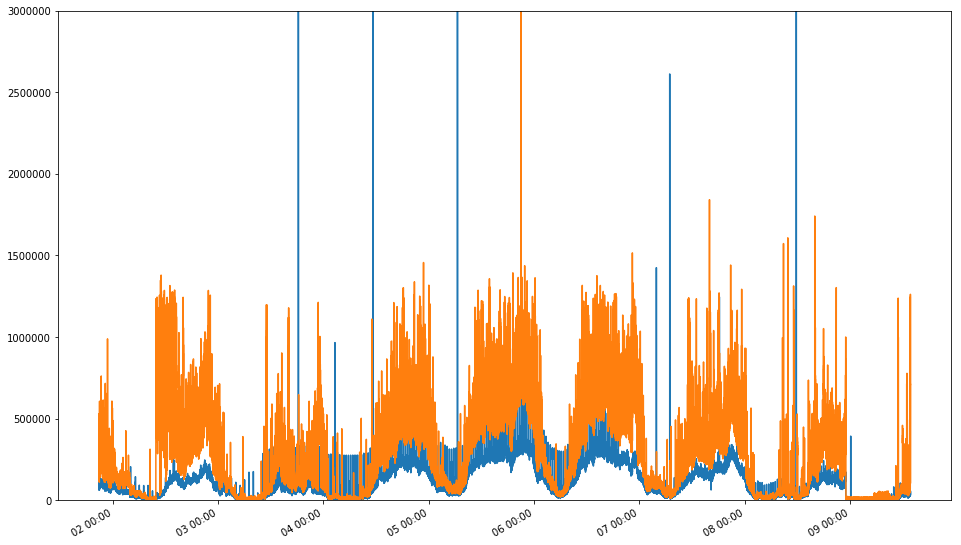

In [170]:
fig, ax = plt.subplots(1,figsize=(16,10))
fig.autofmt_xdate()

xfmt = mdates.DateFormatter('%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
# plt.xticks(arr)

plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["receive_bytes"])
plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["send_bytes"])
plt.ylim(0, 3000000)

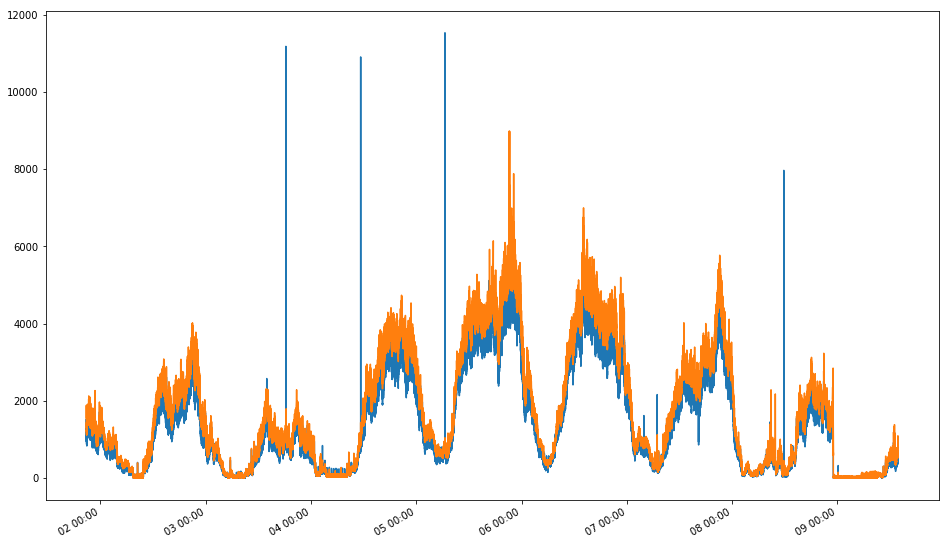

In [165]:
fig, ax = plt.subplots(1,figsize=(16,10))
fig.autofmt_xdate()

xfmt = mdates.DateFormatter('%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
# plt.xticks(arr)

plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["receive_packets"])
plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["send_packets"])

(0, 100)

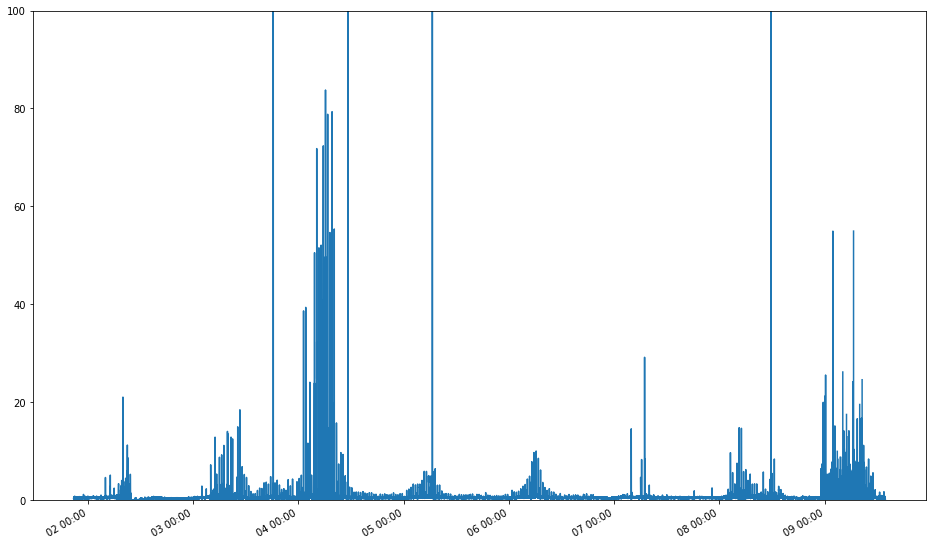

In [173]:
fig, ax = plt.subplots(1,figsize=(16,10))
fig.autofmt_xdate()

xfmt = mdates.DateFormatter('%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
# plt.xticks(arr)

plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["receive_bytes"]/ddosDataDf[timerange]["send_bytes"])
plt.ylim(0, 100)

(-1, 8)

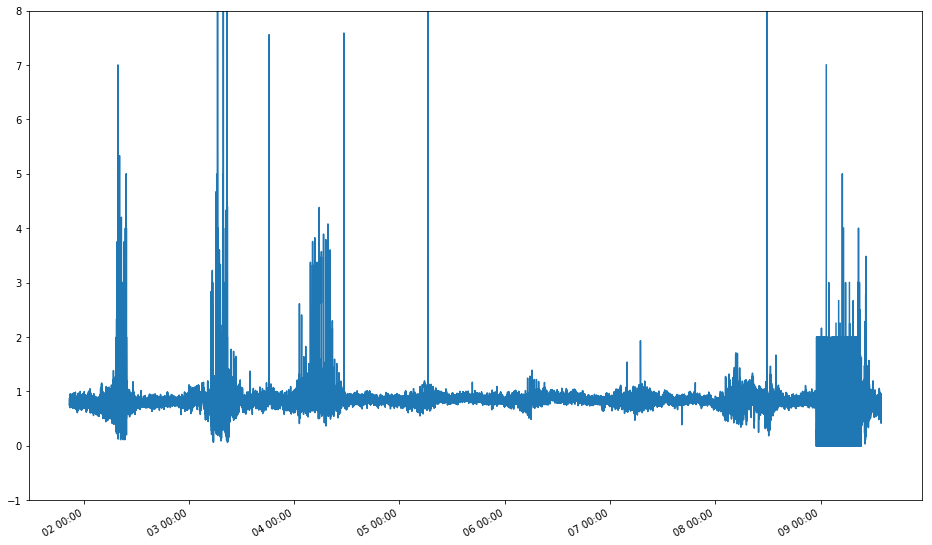

In [167]:
fig, ax = plt.subplots(1,figsize=(16,10))
fig.autofmt_xdate()

xfmt = mdates.DateFormatter('%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
# plt.xticks(arr)

plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["receive_packets"]/ddosDataDf[timerange]["send_packets"])
plt.ylim(-1, 8)

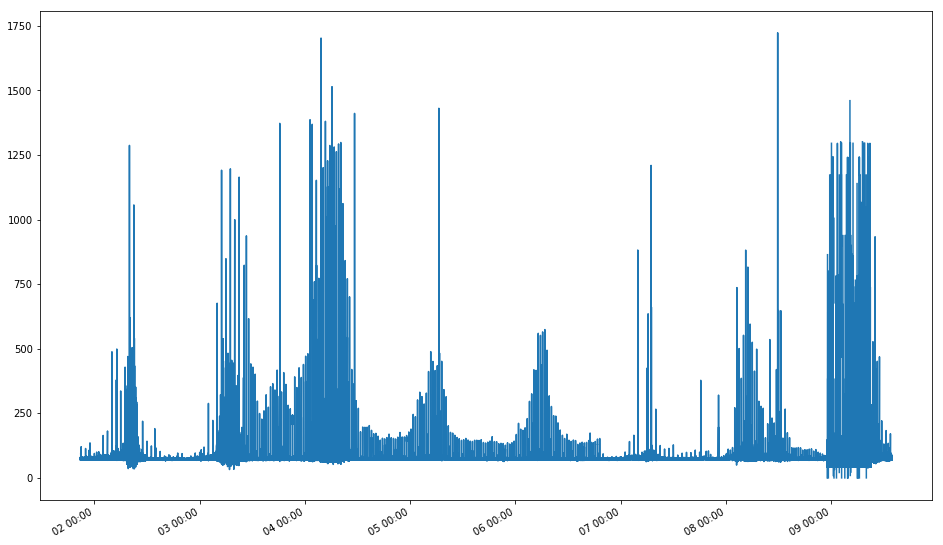

In [168]:
fig, ax = plt.subplots(1,figsize=(16,10))
fig.autofmt_xdate()

xfmt = mdates.DateFormatter('%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
# plt.xticks(arr)

plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["receive_bytes"]/ddosDataDf[timerange]["receive_packets"])


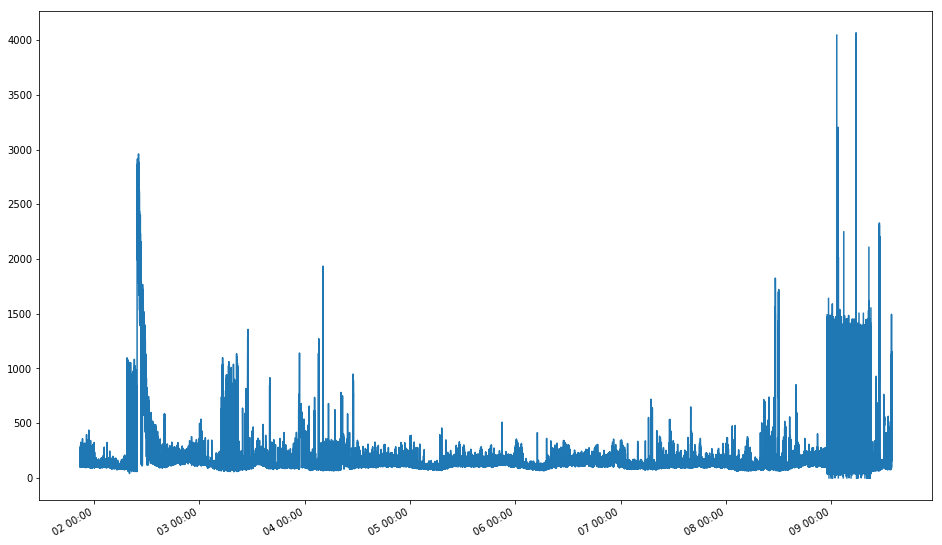

In [169]:
fig, ax = plt.subplots(1,figsize=(16,10))
fig.autofmt_xdate()

xfmt = mdates.DateFormatter('%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
# plt.xticks(arr)

plt.plot(ddosDataDf[timerange]["date"],ddosDataDf[timerange]["send_bytes"]/ddosDataDf[timerange]["send_packets"])